# Cohort 20x20 AUCs analysis

### Imports and environment setup

- Date of run: 2024-08-14
- Environment: python 3.12
- Packages required: pandas, numpy, sklearn, statsmodels, seaborn, matplotlib

In [1]:
# Include in the environment the code directory with the utils function
import sys
sys.path.append('../code/')

In [2]:
# Library imports
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Utils imports
import cohort_analysis_utils as utils

In [3]:
# Remove warnings for readability
import warnings
warnings.filterwarnings('ignore')

# Remove cell printing limits
pd.set_option('display.max_rows', None)


# Data loading and preprosessing

The original excel files (available [here](<https://mimarkdx.sharepoint.com/:x:/s/Scientific/EYTYFR9Sf1lCmklyWuJ_J1EBmEgxpzIgZmFdVlEoX6WqTg?e=rM6qd9>)) were saved into a CSV file in the data folder of this repository, separating fields by TABs.

In [4]:
df_20x20_MMK_2024 = pd.read_csv('../data/20x20_MMK_2024.csv' , sep='\t', index_col=0, header=0)
df_20x20_RUO_2024 = pd.read_csv('../data/20x20_RUO_2024.csv' , sep='\t', index_col=0, header=0)


In [5]:
# Merge the two dataframes by the index
df_20x20 = pd.merge(df_20x20_MMK_2024, df_20x20_RUO_2024, left_index=True, right_index=True)

In [6]:
# Harmonization of column names
df_20x20 = utils.normalize_column_names(df_20x20)

In [7]:
# Ensure numeric columns are treated as such
cols_120_to_num = ['AGRIN_MMK_2024', 'KPYM_MMK_2024',
       'HSPB1_MMK_2024', 'MMP9_MMK_2024', 'MMP9_MMK_2024', 'HSPB1_RUO_2022',
       'MMP9_RUO_2022', 'MMP9_RUO_2022', 'TP', 'MMP9_RUO_2024',
       'HSPB1_RUO_2024', 'PERM_RUO_2024', 'TP_2024']
df_20x20 = utils.cols_as_numbers(df_20x20, cols_120_to_num)

In [8]:
# keep only Pathology_x and rename it to Pathology
df_20x20 = df_20x20.drop(columns=['Pathology_x'])
df_20x20 = df_20x20.rename(columns={'Pathology_y': 'Pathology'})

In [9]:
# Ensure categorical columns are treated as such
df_20x20 = utils.cols_as_category(df_20x20, {'Pathology':{'Benign': 0, 'EC': 1}})
df_20x20 = utils.cols_as_category(df_20x20, {'Assay_date':{'Day1':0, 'Day2':1, 'Day3':2, 'Day3_Rep':3, 'Day3_Rep_PERM':4}})

In [10]:
# Drop outlier index 1385 (just a test, comment)
# df_20x20 = df_20x20.drop(index=1385)


# Execution parameters

In [11]:
PLOT_ROCS = True
MAX_BIOMARKER_COUNT = 1
RESULTS_PATH = '../data/results/20x20'

# Columns to be considered as biomarkers
BIOMARKERS_MMK_2024 = ['AGRIN_MMK_2024', 'KPYM_MMK_2024', 'HSPB1_MMK_2024', 'PERM_MMK_2024', 'MMP9_MMK_2024']
BIOMARKERS_RUO_2022 = ['HSPB1_RUO_2022', 'PERM_RUO_2022', 'MMP9_RUO_2022']
BIOMARKERS_RUO_2024 = ['HSPB1_RUO_2024', 'PERM_RUO_2024', 'MMP9_RUO_2024']

NORMALIZING_COL_2022 = 'TP' # Column to be used for normalizing the biomarkers on the 2022 cohort
NORMALIZING_COL_2024 = 'TP_2024' # Column to be used for normalizing the biomarkers on the 2024 cohort

In [12]:
METHODS = ['direct', 'normalized']

# Computing the models

All the functions to generate the models are included in the [cohort_analysis_utils.py](../code/cohort_analysis_utils.py) file.


The methods used to compute the AUCs and ROCs on this analysis are 'direct' and 'normalized' (by [Total protein]). For a full description of the methods please see the [60x60 cohort analysis](<./60x60_aucs_analysis.ipynb>).

In [13]:
models_20x20_MMK_2024 = utils.compute_all_models_and_save(
                            df=df_20x20,
                            biomarkers=BIOMARKERS_MMK_2024,
                            normalizing_col=NORMALIZING_COL_2024, 
                            volume_col='Collected_volume_mL',
                            apply_log=True,
                            avoid_same_biomarker=True,
                            methods=METHODS,
                            max_biomarker_count=MAX_BIOMARKER_COUNT,
                            folder_name='../data/results/20x20/MMK_2024',
                            plot_rocs=PLOT_ROCS,
                            compute_auc_ci=True,
                            )

In [14]:
models_20x20_RUO_2024 = utils.compute_all_models_and_save(
                            df=df_20x20,
                            biomarkers=BIOMARKERS_RUO_2024,
                            normalizing_col=NORMALIZING_COL_2024, 
                            volume_col='Collected_volume_mL',
                            apply_log=True,
                            avoid_same_biomarker=True,
                            methods=METHODS,
                            max_biomarker_count=MAX_BIOMARKER_COUNT,
                            folder_name='../data/results/20x20/RUO_2024',
                            plot_rocs=PLOT_ROCS,
                            compute_auc_ci=True,
                            )

In [15]:
models_20x20_RUO_2022 = utils.compute_all_models_and_save(
                            df=df_20x20,
                            biomarkers=BIOMARKERS_RUO_2022,
                            normalizing_col=NORMALIZING_COL_2022, 
                            volume_col='Collected_volume_mL',
                            apply_log=True,
                            avoid_same_biomarker=True,
                            methods=METHODS,
                            max_biomarker_count=MAX_BIOMARKER_COUNT,
                            folder_name='../data/results/20x20/RUO_2022',
                            plot_rocs=PLOT_ROCS,
                            compute_auc_ci=True,
                            )

# Results

## Direct

Here are presented results for the direct method for the three subsets of biomarkers. Remember you can see the full results in the folder "data/results/20x20 and all the ROCs in the "rocs" subfolder of each analysis.

### MiMARK 2024

In [16]:
pd.read_csv('../data/results/20x20/MMK_2024/direct/max_1.csv', sep=',', header=0)[['Biomarker_1','AUC']]


,Biomarker_1,AUC
0,KPYM_MMK_2024,0.74706
1,HSPB1_MMK_2024,0.71569
2,AGRIN_MMK_2024,0.71471
3,PERM_MMK_2024,0.70000
4,MMP9_MMK_2024,0.66176


### RUO 2024

In [17]:
pd.read_csv('../data/results/20x20/RUO_2024/direct/max_1.csv', sep=',', header=0)[['Biomarker_1','AUC']]

,Biomarker_1,AUC
0,HSPB1_RUO_2024,0.83125
1,PERM_RUO_2024,0.76765
2,MMP9_RUO_2024,0.70000


### RUO 2022

In [18]:
pd.read_csv('../data/results/20x20/RUO_2022/direct/max_1.csv', sep=',', header=0)[['Biomarker_1','AUC']]

,Biomarker_1,AUC
0,HSPB1_RUO_2022,0.83947
1,PERM_RUO_2022,0.80000
2,MMP9_RUO_2022,0.76842


## Normalized

### MMK 2024

In [19]:
pd.read_csv('../data/results/20x20/MMK_2024/normalized/max_1.csv', sep=',', header=0)[['Biomarker_1','AUC']]

,Biomarker_1,AUC
0,KPYM_MMK_2024,0.75588
1,PERM_MMK_2024,0.70588
2,AGRIN_MMK_2024,0.68529
3,MMP9_MMK_2024,0.64118
4,HSPB1_MMK_2024,0.64052


### RUO 2024

In [20]:
pd.read_csv('../data/results/20x20/RUO_2024/normalized/max_1.csv', sep=',', header=0)[['Biomarker_1','AUC']]

,Biomarker_1,AUC
0,HSPB1_RUO_2024,0.85000
1,PERM_RUO_2024,0.78824
2,MMP9_RUO_2024,0.68235


### RUO 2022

In [21]:
pd.read_csv('../data/results/20x20/RUO_2022/normalized/max_1.csv', sep=',', header=0)[['Biomarker_1','AUC']]

,Biomarker_1,AUC
0,HSPB1_RUO_2022,0.83947
1,PERM_RUO_2022,0.77368
2,MMP9_RUO_2022,0.76053


# Other analyses

## Total protein distribution analysis

In [22]:
# For convenience, we create a copy with all the values in log-scale
df_20x20_log = df_20x20.copy()
df_20x20_log[BIOMARKERS_MMK_2024] = np.log(df_20x20_log[BIOMARKERS_MMK_2024])
df_20x20_log[NORMALIZING_COL_2024] = np.log(df_20x20_log[NORMALIZING_COL_2024])
df_20x20_log[NORMALIZING_COL_2022] = np.log(df_20x20_log[NORMALIZING_COL_2022])
df_20x20_log[BIOMARKERS_RUO_2022] = np.log(df_20x20_log[BIOMARKERS_RUO_2022])
df_20x20_log[BIOMARKERS_RUO_2024] = np.log(df_20x20_log[BIOMARKERS_RUO_2024])


<Axes: ylabel='Density'>

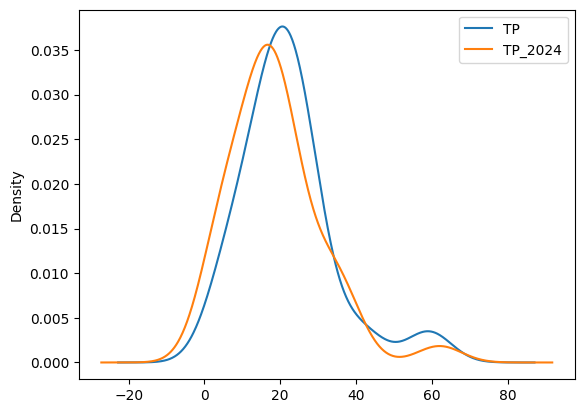

In [23]:
# Let's see the distribution of the two columns
df_20x20[['TP', 'TP_2024']].plot.kde()


As we can observe, both total proteins (2022 & 2024) have very similar distributions. This were the distributions as a whole, let's substract from each sample the $[TP]_{2022} - [TP]_{2024}$ to see that they are matched and isn't just an artifact:

The results from the first plot are sustained, and we can observe a small tendency of having a bigger $[TP]_{2022}$. 

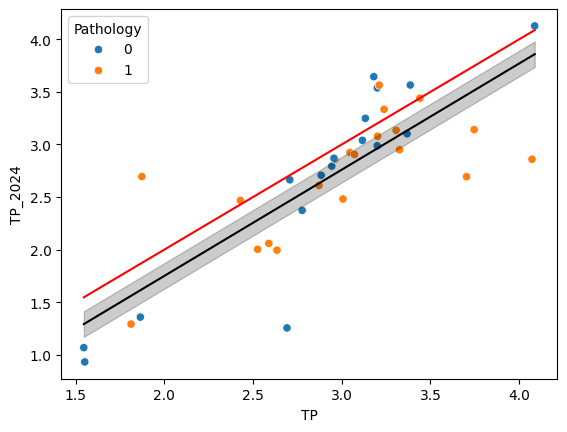

In [24]:
utils.plot_biomarker_correlation(df_20x20_log.dropna(subset=['TP', 'TP_2024']), 'TP', 'TP_2024')

The red line represents a perfect regression and the black line represents the actual regression between the two variables. They shade in gray represents the standard error arround the regression. As can be observed, while the regression is not perfect, is consistent.

## RUO 2022 vs 2024

### PERM RUO 2022 vs 2024

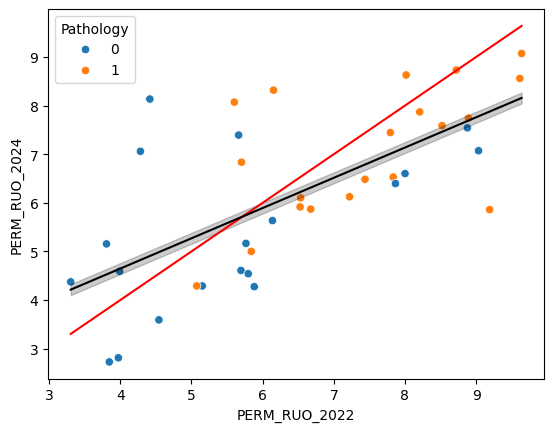

In [25]:
utils.plot_biomarker_correlation(df_20x20_log, 'PERM_RUO_2022', 'PERM_RUO_2024')

__Note__: Unlike MMP9 & HSPB1 (below) this is NOT a good regression, there is high variability: each data point is far from the regression line (this is log scale so numbers are quite different). 

### MMP9 RUO 2022 vs 2024

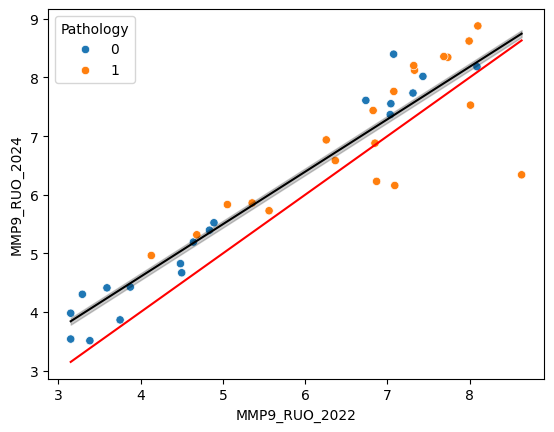

In [26]:
utils.plot_biomarker_correlation(df_20x20_log, 'MMP9_RUO_2022', 'MMP9_RUO_2024')

### HSPB1 RUO 2022 vs 2024

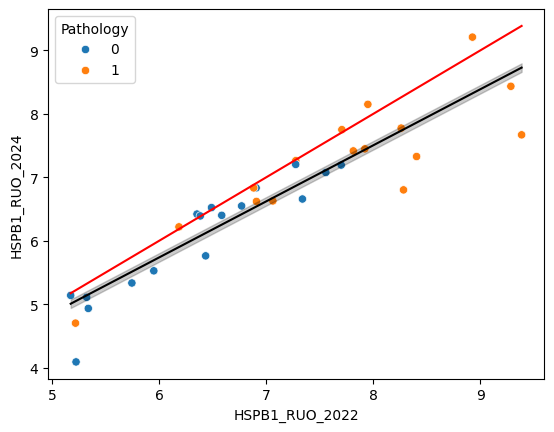

In [27]:
utils.plot_biomarker_correlation(df_20x20_log.dropna(subset=['HSPB1_RUO_2022', 'HSPB1_RUO_2024']), 'HSPB1_RUO_2022', 'HSPB1_RUO_2024')

## RUO vs MMK 2024

### PERM 

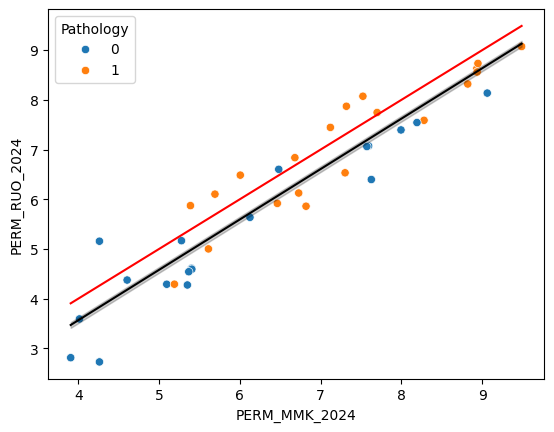

In [28]:
utils.plot_biomarker_correlation(df_20x20_log, 'PERM_MMK_2024', 'PERM_RUO_2024')

### MMP9

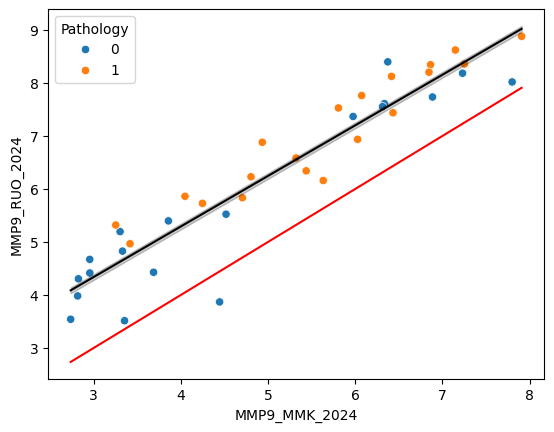

In [29]:
utils.plot_biomarker_correlation(df_20x20_log, 'MMP9_MMK_2024', 'MMP9_RUO_2024')

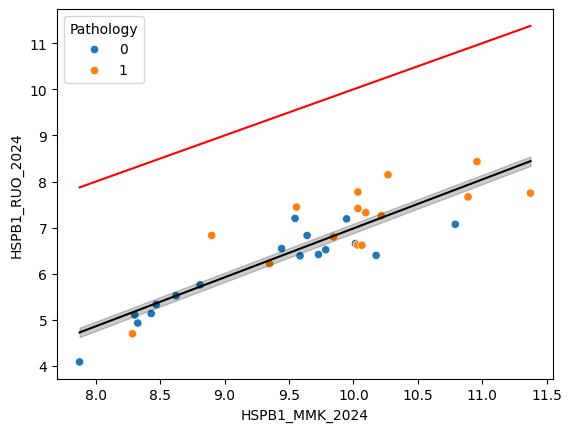

In [30]:
utils.plot_biomarker_correlation(df_20x20_log.dropna(subset=[ 'HSPB1_MMK_2024', 'HSPB1_RUO_2024']), 'HSPB1_MMK_2024', 'HSPB1_RUO_2024')

## AUCs confidence interval

Being this a small cohort, let's compute the 95% confidence interval AUCs for each single biomarker, to see the ranges of values the AUCs could have.

AUCs confidence intervals are computed with the bootstraping method. Bootstrapping to compute confidence intervals for AUC involves repeatedly resampling the original dataset with replacement to create many bootstrap samples, calculating the AUC for each sample, and then constructing a distribution of these AUC values. The confidence interval is determined by taking the appropriate percentiles (e.g., 2.5th and 97.5th for a 95% CI) from the sorted bootstrap AUC values, providing a range that estimates where the true AUC likely falls.

In [31]:
aucs = []
auc_cis = []
models = []

for model in models_20x20_MMK_2024['direct'][(list(models_20x20_MMK_2024['direct'].keys())[0])].keys():
    model_name = model[0]
    model_auc = models_20x20_MMK_2024['direct'][(list(models_20x20_MMK_2024['direct'].keys())[0])][model]['auc']
    model_auc_ci = models_20x20_MMK_2024['direct'][(list(models_20x20_MMK_2024['direct'].keys())[0])][model]['auc_ci']
    aucs.append(float(model_auc))
    auc_cis.append([float(model_auc_ci[0]), float(model_auc_ci[1])])
    models.append(model_name)

for model in models_20x20_RUO_2024['direct'][(list(models_20x20_RUO_2024['direct'].keys())[0])].keys():
    model_name = model[0]
    model_auc = models_20x20_RUO_2024['direct'][(list(models_20x20_RUO_2024['direct'].keys())[0])][model]['auc']
    model_auc_ci = models_20x20_RUO_2024['direct'][(list(models_20x20_RUO_2024['direct'].keys())[0])][model]['auc_ci']
    aucs.append(float(model_auc))
    auc_cis.append([float(model_auc_ci[0]), float(model_auc_ci[1])])
    models.append(model_name)

for model in models_20x20_RUO_2022['direct'][(list(models_20x20_RUO_2022['direct'].keys())[0])].keys():
    model_name = model[0]
    model_auc = models_20x20_RUO_2022['direct'][(list(models_20x20_RUO_2022['direct'].keys())[0])][model]['auc']
    model_auc_ci = models_20x20_RUO_2022['direct'][(list(models_20x20_RUO_2022['direct'].keys())[0])][model]['auc_ci']
    aucs.append(float(model_auc))
    auc_cis.append([float(model_auc_ci[0]), float(model_auc_ci[1])])
    models.append(model_name)
    

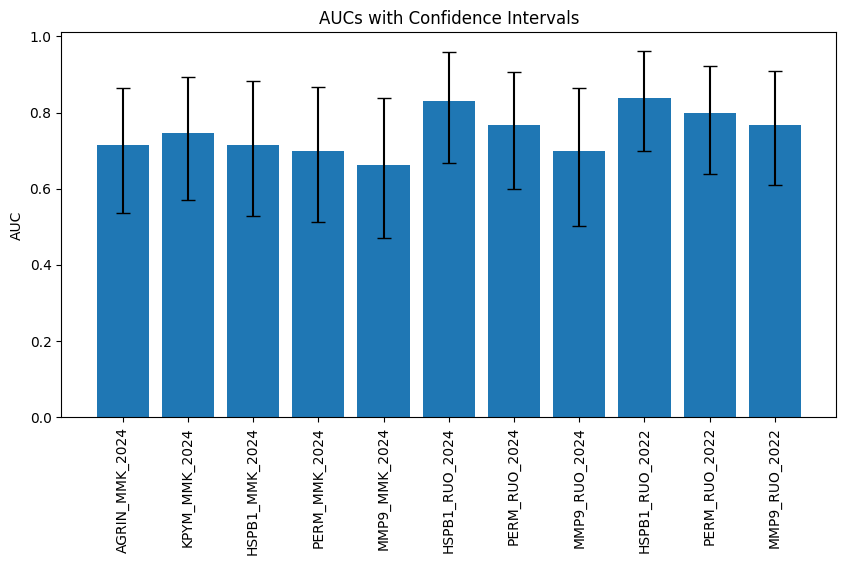

In [32]:
auc_cis = np.array(auc_cis)

# Calculate the errors
lower_err = aucs - auc_cis[:, 0]
upper_err = auc_cis[:, 1] - aucs
yerr = [lower_err, upper_err]

plt.figure(figsize=(10,5))
plt.bar(models, aucs, yerr=yerr, capsize=5, align='center')
plt.xticks(rotation=90)
plt.ylabel('AUC')
plt.title('AUCs with Confidence Intervals')
plt.show()

## Figures ESMO poster

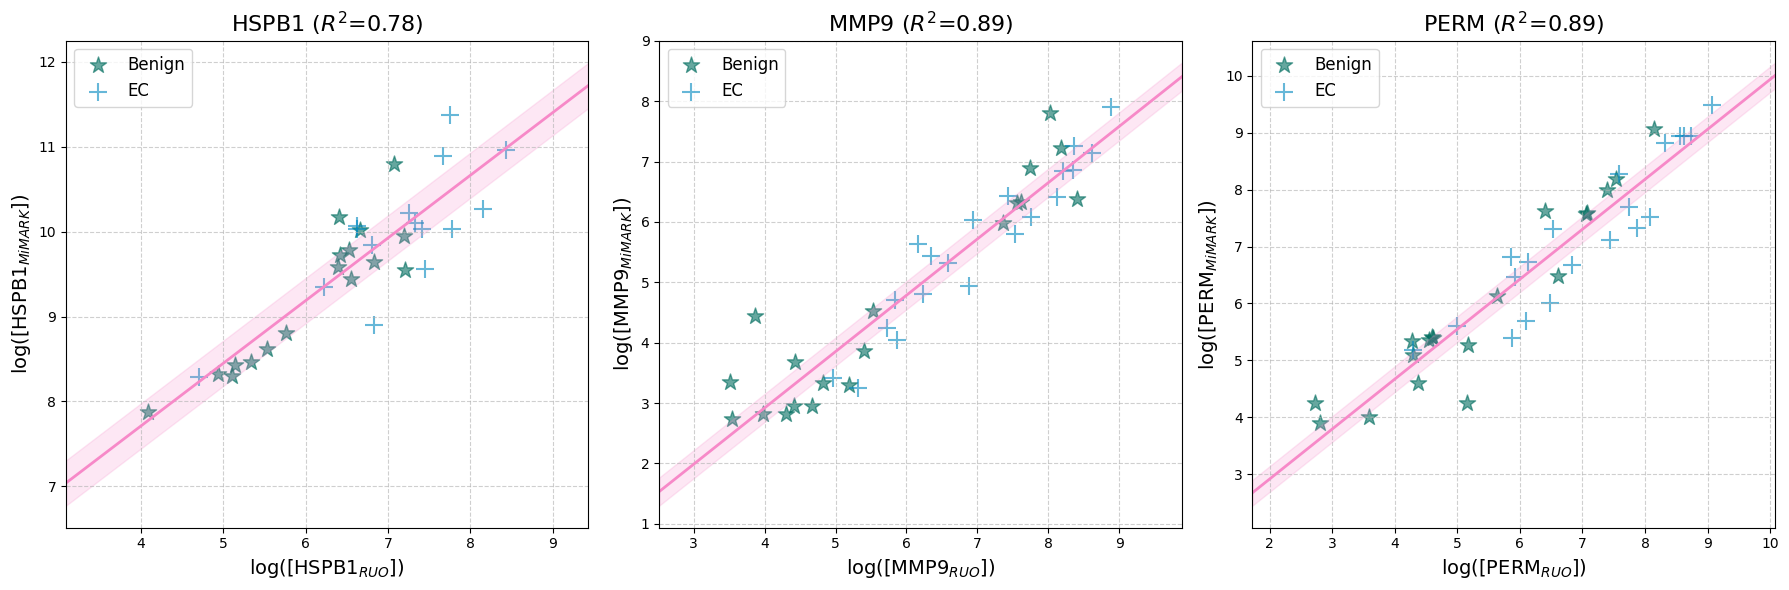

In [38]:

# Define the biomarkers and target column
biomarkers = [
    ('HSPB1_RUO_2024', 'HSPB1_MMK_2024'),
    ('MMP9_RUO_2024', 'MMP9_MMK_2024'),
    ('PERM_RUO_2024', 'PERM_MMK_2024')
]
target_col = 'Pathology'

# Set up the figure for three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Set a consistent color palette
colors = ['#006D5F', '#0088BF']
markers = ['*', '+'] 

# Iterate over each biomarker pair to create subplots
for i, (biomarker_x, biomarker_y) in enumerate(biomarkers):
    ax = axes[i]
    
    # Filter the data for the current biomarkers
    df_filtered = df_20x20_log.dropna(subset=[biomarker_x, biomarker_y])

    # Filter the outlier for HSPB1
    #if biomarker_x.split("_")[0] == 'HSPB1':
    #    df_filtered = df_filtered[df_filtered[biomarker_y] > 7]
    
    # Create the scatter plot
    for j, (label, color, marker) in enumerate(zip(['Benign', 'EC'], colors, markers)):
        ax.scatter(df_filtered[df_filtered[target_col] == j][biomarker_x], 
                   df_filtered[df_filtered[target_col] == j][biomarker_y], 
                   color=color, marker=marker, label=label, s=150, alpha=0.6)
    
    # Set labels with larger font size
    ax.set_xlabel(f"log([{biomarker_x.split('_')[0]}$_{{RUO}}$])", fontsize=14)
    ax.set_ylabel(f"log([{biomarker_y.split('_')[0]}$_{{MiMARK}}$])", fontsize=14)
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_filtered[biomarker_x], df_filtered[biomarker_y])
    
    # Extend the regression line beyond the data range
    x_range = np.linspace(df_filtered[biomarker_x].min() - 1, df_filtered[biomarker_x].max() + 1, 100)
    y = slope * x_range + intercept
    ax.plot(x_range, y, color='#f789c8', linewidth=2)
    
    # Plot the confidence interval
    ax.fill_between(x_range, y + std_err**(0.5), y - std_err**(0.5), color='#f789c8', alpha=0.2)
    
    # Set the title with R-squared value and larger font size
    ax.set_title(f'{biomarker_x.split("_")[0]} ($R^2$={r_value**2:.2f})', fontsize=16)
    
    # Add grid lines
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # Add legend with larger font size
    ax.legend(fontsize=12)

    # Adjust x-axis limits to maintain the extended line within the plot
    ax.set_xlim(df_filtered[biomarker_x].min() - 1, df_filtered[biomarker_x].max() + 1)

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# save the figure
fig.savefig(RESULTS_PATH+'/figures_esmo/biomarker_correlations.svg', format='svg', dpi=1200)

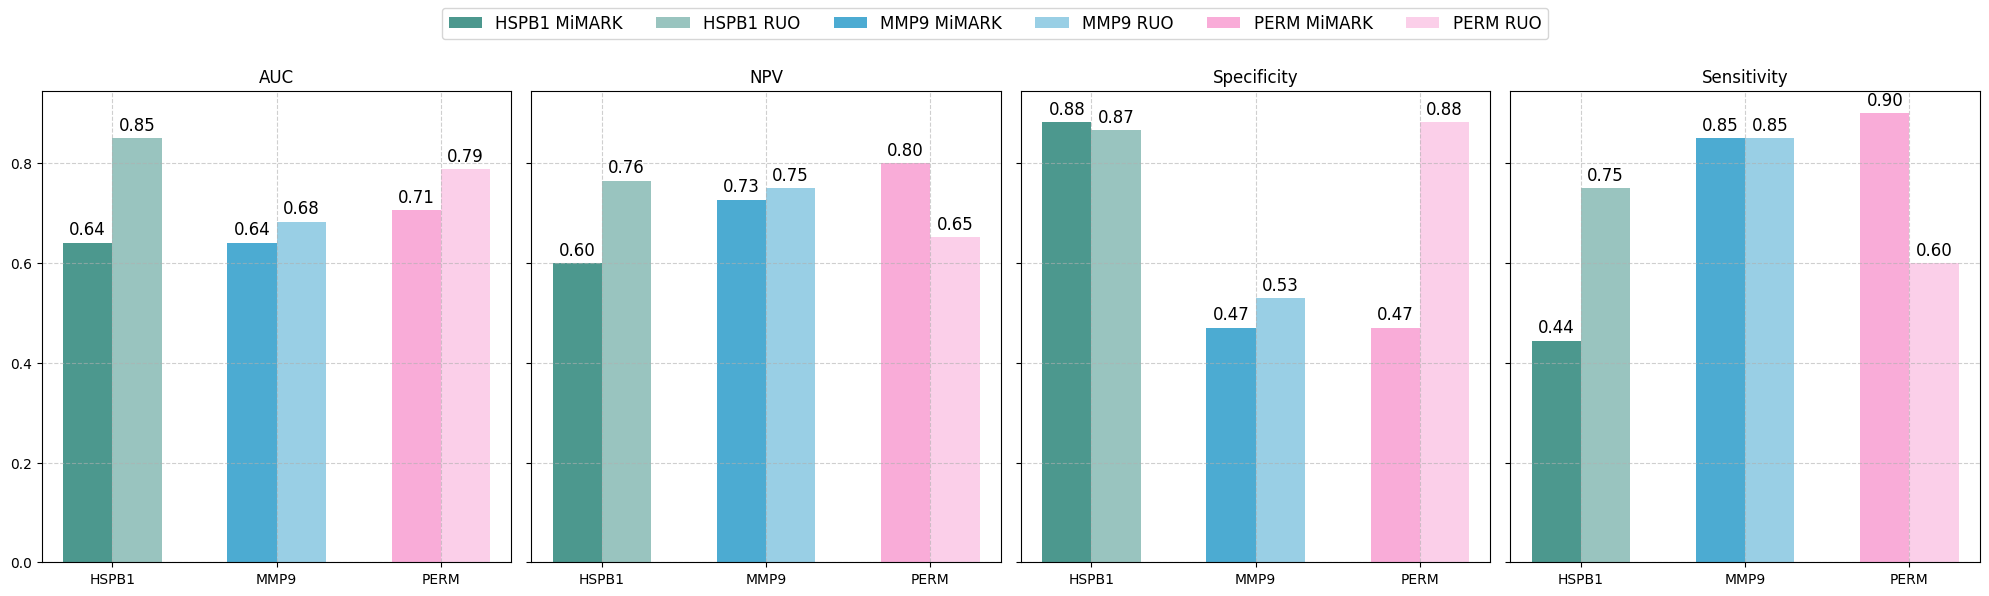

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc

# Function to compute AUC and best threshold
def compute_metrics(df):
    # Compute AUC using the trapezoidal rule
    auc_value = auc(1 - df['Specificity'], df['Sensitivity'])

    # Find the threshold that maximizes sensitivity + specificity
    df['Sum_Sens_Spec'] = df['Sensitivity'] + df['Specificity']
    best_index = df['Sum_Sens_Spec'].idxmax()
    best_threshold = df.loc[best_index, 'Threshold']
    best_sensitivity = df.loc[best_index, 'Sensitivity']
    best_specificity = df.loc[best_index, 'Specificity']
    best_npv = df.loc[best_index, 'NPV']
    
    return {
        'AUC': auc_value,
        'Sensitivity': best_sensitivity,
        'Specificity': best_specificity,
        'NPV': best_npv
    }

# Load the dataframes
roc_curve_HSPB1_MMK_2024 = pd.read_csv('../data/results/20x20/MMK_2024/normalized/max_1/rocs/HSPB1_MMK_2024.csv', sep=',', header=0)
roc_curve_MMP9_MMK_2024 = pd.read_csv('../data/results/20x20/MMK_2024/normalized/max_1/rocs/MMP9_MMK_2024.csv', sep=',', header=0)
roc_curve_PERM_MMK_2024 = pd.read_csv('../data/results/20x20/MMK_2024/normalized/max_1/rocs/PERM_MMK_2024.csv', sep=',', header=0)

roc_curve_HSPB1_RUO_2024 = pd.read_csv('../data/results/20x20/RUO_2024/normalized/max_1/rocs/HSPB1_RUO_2024.csv', sep=',', header=0)
roc_curve_MMP9_RUO_2024 = pd.read_csv('../data/results/20x20/RUO_2024/normalized/max_1/rocs/MMP9_RUO_2024.csv', sep=',', header=0)
roc_curve_PERM_RUO_2024 = pd.read_csv('../data/results/20x20/RUO_2024/normalized/max_1/rocs/PERM_RUO_2024.csv', sep=',', header=0)

# Compute metrics for each biomarker and assay
metrics = {
    'HSPB1_MMK': compute_metrics(roc_curve_HSPB1_MMK_2024),
    'HSPB1_RUO': compute_metrics(roc_curve_HSPB1_RUO_2024),
    'MMP9_MMK': compute_metrics(roc_curve_MMP9_MMK_2024),
    'MMP9_RUO': compute_metrics(roc_curve_MMP9_RUO_2024),
    'PERM_MMK': compute_metrics(roc_curve_PERM_MMK_2024),
    'PERM_RUO': compute_metrics(roc_curve_PERM_RUO_2024)
}

# Convert the metrics dictionary into a DataFrame
df_metrics = pd.DataFrame(metrics).T  # Transpose to align assays as rows

# Select relevant metrics for plotting
df_metrics = df_metrics[['AUC', 'NPV', 'Specificity', 'Sensitivity']]

# Restructure the DataFrame for plotting
df_melted = df_metrics.reset_index().melt(id_vars="index", var_name="Metric", value_name="Value")
df_melted.rename(columns={'index': 'Assay'}, inplace=True)

# Create a new column to separate MMK and RUO for visualization
df_melted['Biomarker'] = df_melted['Assay'].str.split('_').str[0]
df_melted['Type'] = df_melted['Assay'].str.split('_').str[1]

# Set the color palette: one color per biomarker, different alpha for MMK and RUO
color_map = {
    'HSPB1': '#006D5F', 
    'MMP9': '#0088BF',
    'PERM': '#f789c8'
}

# Create the subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

# Set up bar plot parameters
bar_width = 0.3
bar_spacing = 0.15
metrics_list = ['AUC', 'NPV', 'Specificity', 'Sensitivity']

# Loop through each subplot
for i, ax in enumerate(axes):
    metric = metrics_list[i]
    index = np.arange(len(df_melted['Biomarker'].unique()))

    for j, biomarker in enumerate(df_melted['Biomarker'].unique()):
        df_subset_mmk = df_melted[(df_melted['Biomarker'] == biomarker) & (df_melted['Type'] == 'MMK') & (df_melted['Metric'] == metric)]
        df_subset_ruo = df_melted[(df_melted['Biomarker'] == biomarker) & (df_melted['Type'] == 'RUO') & (df_melted['Metric'] == metric)]

        ax.bar(index[j] - bar_width/2, df_subset_mmk['Value'], bar_width,
               label=f'{biomarker} MMK', color=color_map[biomarker], alpha=0.7)
        ax.bar(index[j] + bar_width/2, df_subset_ruo['Value'], bar_width,
               label=f'{biomarker} RUO', color=color_map[biomarker], alpha=0.4)

    ax.set_title(metric)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_xticks(index)
    ax.set_xticklabels(df_melted['Biomarker'].unique())

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 3), textcoords='offset points', fontsize=12, color='black')

# Adjust the layout and add legend
plt.tight_layout()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, [x.replace("MMK", "MiMARK") for x in labels], loc='upper center', ncol=6, fontsize=12)

# Final layout adjustments
plt.subplots_adjust(top=0.85)
plt.show()

# save the figure
fig.savefig(RESULTS_PATH+'/figures_esmo/metrics_biomarkers.svg', format='svg', dpi=1200)

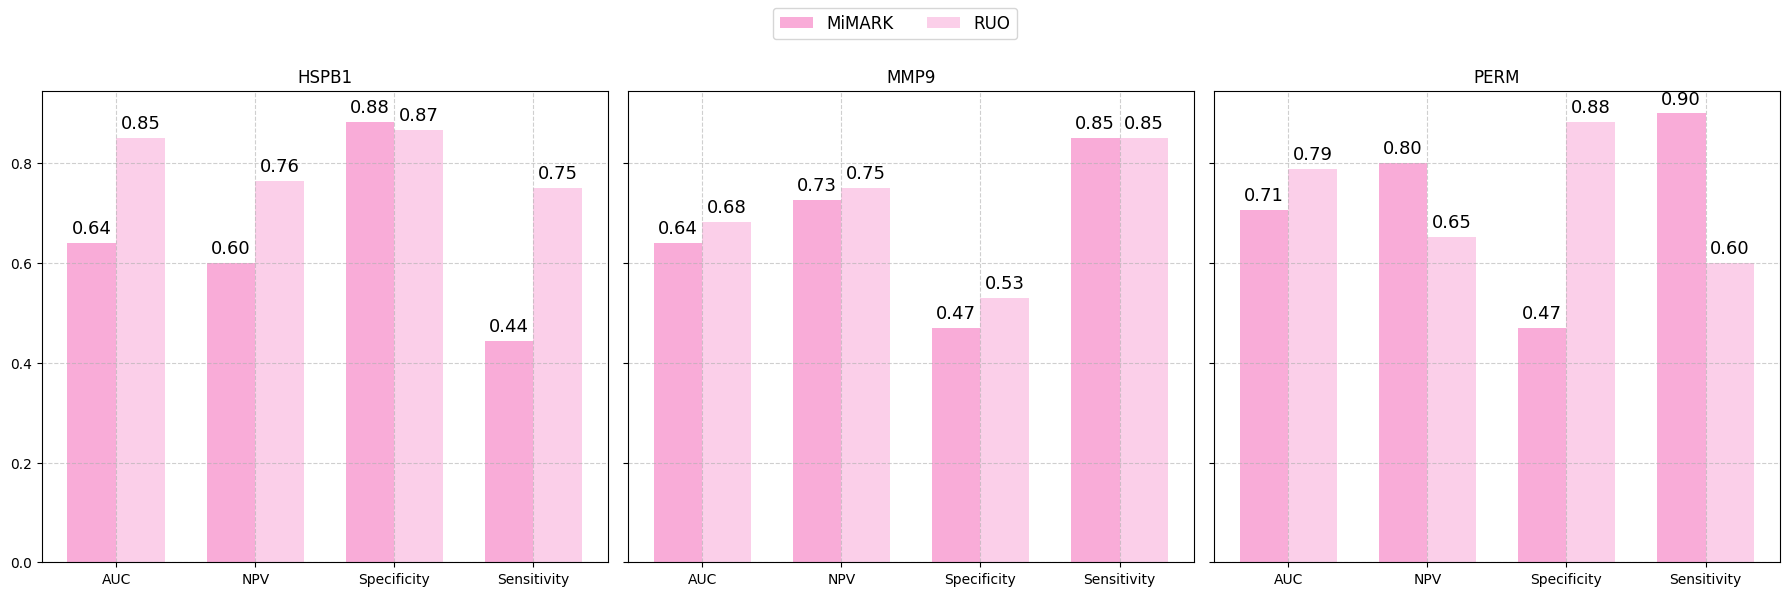

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import auc

# Function to compute AUC and best threshold
def compute_metrics(df):
    # Compute AUC using the trapezoidal rule
    auc_value = auc(1 - df['Specificity'], df['Sensitivity'])

    # Find the threshold that maximizes sensitivity + specificity
    df['Sum_Sens_Spec'] = df['Sensitivity'] + df['Specificity']
    best_index = df['Sum_Sens_Spec'].idxmax()
    best_threshold = df.loc[best_index, 'Threshold']
    best_sensitivity = df.loc[best_index, 'Sensitivity']
    best_specificity = df.loc[best_index, 'Specificity']
    best_npv = df.loc[best_index, 'NPV']
    
    return {
        'AUC': auc_value,
        'Sensitivity': best_sensitivity,
        'Specificity': best_specificity,
        'NPV': best_npv
    }

# Load the dataframes
roc_curve_HSPB1_MMK_2024 = pd.read_csv('../data/results/20x20/MMK_2024/normalized/max_1/rocs/HSPB1_MMK_2024.csv', sep=',', header=0)
roc_curve_MMP9_MMK_2024 = pd.read_csv('../data/results/20x20/MMK_2024/normalized/max_1/rocs/MMP9_MMK_2024.csv', sep=',', header=0)
roc_curve_PERM_MMK_2024 = pd.read_csv('../data/results/20x20/MMK_2024/normalized/max_1/rocs/PERM_MMK_2024.csv', sep=',', header=0)

roc_curve_HSPB1_RUO_2024 = pd.read_csv('../data/results/20x20/RUO_2024/normalized/max_1/rocs/HSPB1_RUO_2024.csv', sep=',', header=0)
roc_curve_MMP9_RUO_2024 = pd.read_csv('../data/results/20x20/RUO_2024/normalized/max_1/rocs/MMP9_RUO_2024.csv', sep=',', header=0)
roc_curve_PERM_RUO_2024 = pd.read_csv('../data/results/20x20/RUO_2024/normalized/max_1/rocs/PERM_RUO_2024.csv', sep=',', header=0)

# Compute metrics for each biomarker and assay
metrics = {
    'HSPB1_MMK': compute_metrics(roc_curve_HSPB1_MMK_2024),
    'HSPB1_RUO': compute_metrics(roc_curve_HSPB1_RUO_2024),
    'MMP9_MMK': compute_metrics(roc_curve_MMP9_MMK_2024),
    'MMP9_RUO': compute_metrics(roc_curve_MMP9_RUO_2024),
    'PERM_MMK': compute_metrics(roc_curve_PERM_MMK_2024),
    'PERM_RUO': compute_metrics(roc_curve_PERM_RUO_2024)
}

# Convert the metrics dictionary into a DataFrame
df_metrics = pd.DataFrame(metrics).T  # Transpose to align assays as rows

# Select relevant metrics for plotting
df_metrics = df_metrics[['AUC', 'NPV', 'Specificity', 'Sensitivity']]

# Restructure the DataFrame for plotting
df_melted = df_metrics.reset_index().melt(id_vars="index", var_name="Metric", value_name="Value")
df_melted.rename(columns={'index': 'Assay'}, inplace=True)

# Create a new column to separate MMK and RUO for visualization
df_melted['Biomarker'] = df_melted['Assay'].str.split('_').str[0]
df_melted['Type'] = df_melted['Assay'].str.split('_').str[1]

# Updated color palette
color_map = {
    'HSPB1': '#f789c8', 
    'MMP9': '#f789c8',
    'PERM': '#f789c8'
}

# Create the subplots, one for each biomarker
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Set up bar plot parameters
bar_width = 0.35
bar_spacing = 0.15
biomarkers = ['HSPB1', 'MMP9', 'PERM']

# Loop through each subplot for each biomarker
for i, ax in enumerate(axes):
    biomarker = biomarkers[i]
    df_subset = df_melted[df_melted['Biomarker'] == biomarker]
    metrics_list = df_subset['Metric'].unique()
    index = np.arange(len(metrics_list))

    for j, metric in enumerate(metrics_list):
        df_subset_mmk = df_subset[(df_subset['Type'] == 'MMK') & (df_subset['Metric'] == metric)]
        df_subset_ruo = df_subset[(df_subset['Type'] == 'RUO') & (df_subset['Metric'] == metric)]

        ax.bar(index[j] - bar_width/2, df_subset_mmk['Value'], bar_width,
               label=f'{metric} MMK', color=color_map[biomarker], alpha=0.7)
        ax.bar(index[j] + bar_width/2, df_subset_ruo['Value'], bar_width,
               label=f'{metric} RUO', color=color_map[biomarker], alpha=0.4)

    ax.set_title(biomarker)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.set_xticks(index)
    ax.set_xticklabels(metrics_list)

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', xytext=(0, 4), textcoords='offset points', fontsize=13, color='black')

# Adjust the layout and add legend
plt.tight_layout()
handles, labels = ax.get_legend_handles_labels()
fig.legend([handles[0],handles[3]], ["MiMARK", "RUO"], loc='upper center', ncol=6, fontsize=12)

# Final layout adjustments
plt.subplots_adjust(top=0.85)
plt.show()

# save the figure
fig.savefig(RESULTS_PATH+'/figures_esmo/metrics.svg', format='svg', dpi=1200)

# Summary and conclussions

- In the selected sub-cohort of 20x20 samples, the performance of the biomarkers was not the same of the ones in the original cohort, being HSPB1 the one with the highest accuracy.
- Taking this into account, the performance of the RUO_2024 & MMK_2024 are not the same but they mantain the same tendencies. 
- Total protein concentrations were kept with a small tendency to have a bigger readout in 2022.
- Readouts of MMK 2024 & RUO 2024 correlate quite good (slope ~1), HSPB1_RUO tends to have smaller readout than MiMARK, the opposite happens with MMP9, and they are almost the same for PERM. 
- Radouts of RUO 2024 & 2022 are consistent for MMP9 & HSPB1, but they are not for PERM, the regression of PERM 2022 and PERM 2024 is poor (slope ~0, high variability).
- There are missing readouts (e.g. 2 for TP_2024, six for HSPB1_RUO) making some analyses to have up to 8 missing records, which out of 40 is 20%. For a small cohort like this is quite a lot.
- Expectedly, the confidence intervals at 95% are wider in comparison with the 60x60 cohort.
